# Unnormalized Bilateral Filter

Test UBF on a simple case.

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scripts.despeckling import unnormalized_bilateral_filter

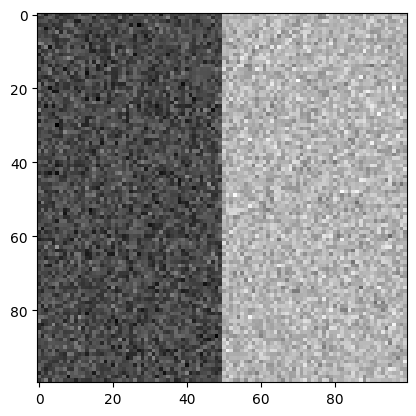

In [13]:
key = jax.random.PRNGKey(0)                           
img = jax.random.normal(key, (100, 100))             
img = img * 0.1 + 0.5                                 

img = img.at[:, :50].add(0.25)
img = img.at[:, 50:].add(0.75)

plt.imshow(img, cmap='gray');

UBF Iterations: 100%|██████████| 20/20 [00:00<00:00, 90.75it/s]


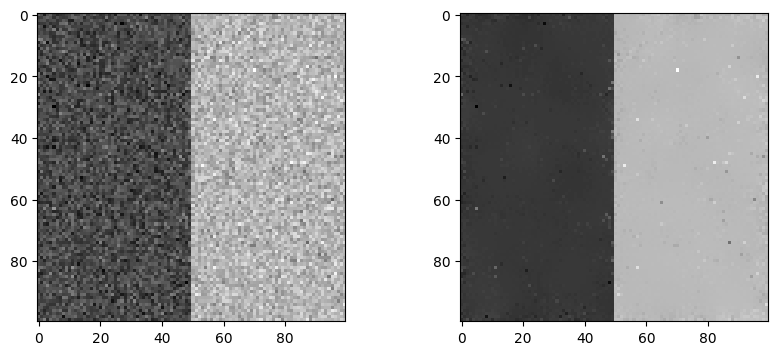

In [18]:
S = img.reshape(100, 100, 1)
L = img.reshape(100, 100, 1)

S_ubf, error = unnormalized_bilateral_filter(S, L, sigma_s=2, sigma_l=0.1, alpha_ubf=1, n_iter=20)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(L[..., 0], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(S_ubf[..., 0], cmap='gray')

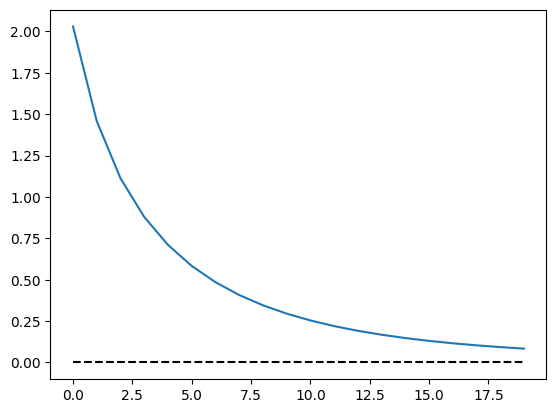

In [23]:
plt.plot(error)
plt.plot(jnp.arange(len(error)), jnp.zeros_like(jnp.array(error)), 'k--')